# <center>***Exploratory Analysis of Ireland Weather***<center>


*********************************


![WEATHER](https://i.pinimg.com/564x/1f/8e/8f/1f8e8f16b0be992424f3f5b849706e8b.jpg)

##### Author: Gabriela Domiciano Avellar
##### Project: Programming for Data Analytics




## Project: Analysis of Weather Forecast Data in Ireland

This project demonstrates how scripts can be used to efficiently manage and process weather forecast data for Ireland. The data was collected from [Historical Data](https://www.met.ie/climate/available-data/historical-data). The aim is to analyze and understand historical weather data, providing detailed insights into weather patterns.

In this project, Met Éireann datasets were used to perform comprehensive analyses and generate visualizations that illustrate climate trends over the years and projections for the future. The evolution of climate data, such as temperature, precipitation, and extreme weather events, is explored to highlight seasonal changes and variations.

******************************

In [580]:
# Import required packages:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [581]:
#This dataset contains weather dataset, including year, month, and day, with maximum and minimum temperatures recorded in Fahrenheit and Celsius from Galway.
# Exploratory Analysis of the DataSet: 'nui_galway.csv'
# Let's take a look at the Dataset.
nui_df = pd.read_csv('/Users/gabrieladomicianoavellar/Desktop/PFDA_project/data/nui_galway.csv')
nui_df

,Year,Month,Day,Max (°F),Min (°F),Max (°C),Min (°C)
0,1851,1,1,NaN,NaN,NaN,NaN
1,1851,1,2,NaN,NaN,NaN,NaN
2,1851,1,3,NaN,NaN,NaN,NaN
3,1851,1,4,NaN,NaN,NaN,NaN
4,1851,1,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
41937,1965,10,27,NaN,NaN,14.8,12.1
41938,1965,10,28,NaN,NaN,13.0,8.6
41939,1965,10,29,NaN,NaN,14.0,6.8
41940,1965,10,30,NaN,NaN,11.4,9.0


In [582]:
# Calculate descriptive statistics, and saves it to a CSV file called 'summary.csv'
nui_df.describe().T.to_csv('data/summary.csv')

- **Year**: Data covers the period 1851 to 1965.
- **Month**: Includes all months.
- **Day**: Covers days 1 to 31.
- **Max (°F)**: Temperatures range from 4°F to 89°F.
- **Min (°F)**: Temperatures range from 11°F to 77°F.
- **Max (°C)**: Highs from -15.6°C to 31.7°C.
- **Min (°C)**: Lows from -11.7°C to 25.0°C.


In [583]:

# Removing rows with missing values in the minimum temperature column
df_min = nui_df.dropna(subset=["Min (°C)"])

# Finding the row with the lowest minimum temperature
temp_min = df_min.loc[df_min["Min (°C)"].idxmin()]

lowest_temp_year = temp_min["Year"]
lowest_temp_month = temp_min["Month"]
lowest_temp_value_c = temp_min["Min (°C)"]

print(f"The lowest temperature was {lowest_temp_value_c:.2f}°C, registered in the month {lowest_temp_month} of the year {lowest_temp_year}.")


The lowest temperature was -11.70°C, registered in the month 1.0 of the year 1945.0.


In [584]:
# Removing rows with missing values in the minimum temperature column
df_max = nui_df.dropna(subset=["Max (°C)"])

# Finding the row with the highest minimum temperature
temp_max = df_max.loc[df_max["Max (°C)"].idxmax()]

# Resultado
highest_temp_year = temp_max["Year"]
highest_temp_month = temp_max["Month"]
highest_temp_value_c = temp_max["Max (°C)"]

print(f"The highest temperature was {highest_temp_value_c:.2f}°C, registered in the month {highest_temp_month} of the year {highest_temp_year}.")


The highest temperature was 31.70°C, registered in the month 7.0 of the year 1921.0.


In [585]:
# The hottest week over the years.

# Removing rows with missing values in the maximum temperature column and creating a new copy to avoid warnings
max_temp_cleaned = nui_df.dropna(subset=["Max (°C)"]).copy()

# Creating a date column using 'Year', 'Month', and 'Day' for easier temporal analysis
max_temp_cleaned.loc[:, 'Date'] = pd.to_datetime(max_temp_cleaned[['Year', 'Month', 'Day']])

# Sorting the DataFrame by date to ensure data is in chronological order
max_temp_cleaned = max_temp_cleaned.sort_values('Date').reset_index(drop=True)

# Calculating the sum of maximum temperatures for each rolling 7-day window
max_temp_cleaned['7_day_sum'] = max_temp_cleaned['Max (°C)'].rolling(window=7).sum()

# Finding the row with the highest 7-day sum of maximum temperatures
hottest_week = max_temp_cleaned.loc[max_temp_cleaned['7_day_sum'].idxmax()]

# Determining the start and end dates of the hottest week
hottest_week_end = hottest_week['Date']
hottest_week_start = hottest_week_end - pd.Timedelta(days=6)

# Extracting the 7 days of the hottest week
hottest_week_df = max_temp_cleaned[
    (max_temp_cleaned['Date'] >= hottest_week_start) & (max_temp_cleaned['Date'] <= hottest_week_end)
]

# Displaying the 7 days and their temperatures
print(f"The hottest week was from {hottest_week_start.strftime('%Y-%m-%d')} to {hottest_week_end.strftime('%Y-%m-%d')}.")
print("Temperatures for the 7 days:")

print(hottest_week_df[['Date', 'Max (°C)', 'Min (°C)']])


The hottest week was from 1934-07-06 to 1934-07-12.
Temperatures for the 7 days:
            Date  Max (°C)  Min (°C)
22633 1934-07-06      25.0      15.0
22634 1934-07-07      26.1      15.6
22635 1934-07-08      28.3      13.3
22636 1934-07-09      30.0      13.3
22637 1934-07-10      31.1      15.6
22638 1934-07-11      31.1      13.3
22639 1934-07-12      30.6      17.2


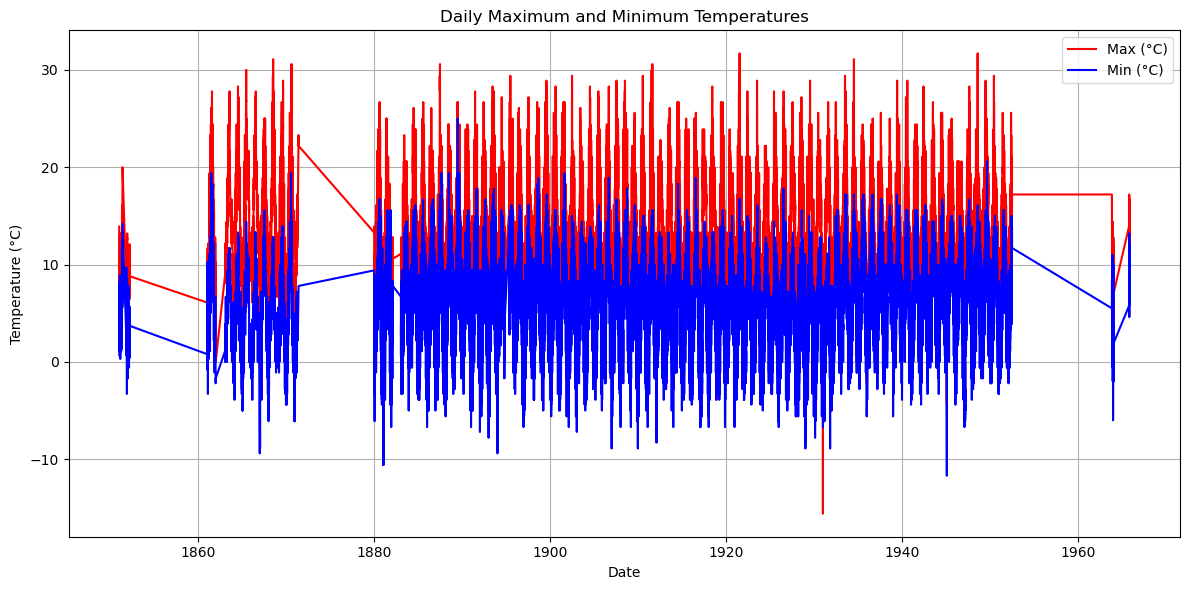

In [586]:

# Create the date column
nui_df['Date'] = pd.to_datetime(nui_df[['Year', 'Month', 'Day']])

# Remove rows with missing values ​​in temperature columns
nui_df_cleaned = nui_df.dropna(subset=['Max (°C)', 'Min (°C)'])

plt.figure(figsize=(12, 6))
plt.plot(nui_df_cleaned['Date'], nui_df_cleaned['Max (°C)'], label='Max (°C)', color='red')
plt.plot(nui_df_cleaned['Date'], nui_df_cleaned['Min (°C)'], label='Min (°C)', color='blue')
plt.title('Daily Maximum and Minimum Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [587]:
# Exploratory Analysis of the DataSet: 'station_details.csv'
# Let's take a look at the Dataset.
station_df = pd.read_csv('/Users/gabrieladomicianoavellar/Desktop/PFDA_project/data/station_details.csv', on_bad_lines='skip')
station_df


,county,station name,name,height(m),easting,northing,latitude,longitude,open year,close year
0,Antrim,5880,LH_RATHLIN_WEST,10,309200,451800,55.30083,-6.28028,2000,(null)
1,Carlow,4415,TULLOW (Waterworks),76,284700,173400,52.80528,-6.74306,1985,(null)
2,Carlow,2414,BORRIS G.S.,85,272400,150700,52.60278,-6.93056,1944,1991
3,Carlow,1214,CARLOW (SUGAR FACTORY),58,272200,178400,52.85139,-6.92778,1953,1960
4,Carlow,115,HACKETSTOWN RECTORY,182,297600,180500,52.86667,-6.55000,1910,1944
...,...,...,...,...,...,...,...,...,...,...
2075,Wicklow,9820,M.LOUGH OULER,457,309693,202757,53.06444,-6.36444,1965,(null)
2076,Wicklow,2415,GLEN IMAAL (For.Stn.),213,297915,194835,52.99556,-6.54250,1951,(null)
2077,Wicklow,2420,OLDBRIDGE (Oakview),335,315640,201555,53.05250,-6.27611,1997,(null)
2078,Wicklow,9915,M.GLEN IMAAL(BALLINABARNY FOR),421,297100,190200,52.95417,-6.55556,1952,1964


In [588]:
# Displaying the list of counties
unique_counties = station_df['county'].unique()
print("List of Counties:")
for county in unique_counties:
    print(county)


List of Counties:
Antrim
Carlow
Cavan
Clare
Cork
Donegal
Dublin
Galway
Kerry
Kildare
Kilkenny
Laois
Leitrim
Limerick
Longford
Louth
Mayo
Meath
Monaghan
Offaly
Roscommon
Sligo
Tipperary
Waterford
Westmeath
Wexford
Wicklow


In [589]:
# Exploratory Analysis of the DataSet: 'all_yearly.csv'
# Let's take a look at the Dataset.
allyear_df = pd.read_csv('/Users/gabrieladomicianoavellar/Desktop/PFDA_project/data/all_yearly.csv')
allyear_df

,station_id,year,n_rain,R5mm,R10mm,R20mm,SDII,PRCPTOT,CDD,CWD,...,TXn,TXx,DTR,TN10p,TN90p,TX10p,TX90p,WSDI,CSDI,GSL
0,ATHENRY,2012,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.054,25.70,6.879,NaN,NaN,NaN,NaN,NaN,NaN,328.0
1,ATHENRY,2013,365,78.0,33.0,9.0,6.703,1112.7,29.1,87.3,...,2.570,29.23,7.216,NaN,NaN,NaN,NaN,NaN,NaN,321.0
2,ATHENRY,2014,365,96.0,35.0,5.0,6.468,1235.3,31.9,58.1,...,4.791,26.65,7.532,NaN,NaN,NaN,NaN,NaN,NaN,337.0
3,ATHENRY,2015,365,116.0,50.0,10.0,7.527,1543.1,34.5,85.3,...,2.837,22.83,7.469,NaN,NaN,NaN,NaN,NaN,NaN,353.0
4,ATHENRY,2016,366,76.0,23.0,3.0,5.623,1045.8,30.0,59.2,...,3.212,28.41,7.238,NaN,NaN,NaN,NaN,NaN,NaN,304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,VALENTIA OBSERVATORY,2019,365,117.0,59.0,11.0,8.039,1664.0,37.0,84.6,...,4.809,28.03,5.048,5.479,24.110,4.384,9.041,8.0,0.0,359.0
1737,VALENTIA OBSERVATORY,2020,366,124.0,64.0,20.0,9.283,1912.3,60.6,108.9,...,6.532,24.07,5.254,4.918,14.208,2.732,12.568,12.0,0.0,360.0
1738,VALENTIA OBSERVATORY,2021,365,101.0,47.0,17.0,7.700,1524.6,61.4,95.8,...,3.781,28.30,5.302,5.753,20.822,6.027,13.973,6.0,0.0,349.0
1739,VALENTIA OBSERVATORY,2022,365,109.0,60.0,19.0,8.786,1651.7,37.3,108.4,...,3.331,25.53,5.452,4.670,24.725,4.121,18.956,22.0,10.0,340.0


This dataset contains weather data from different weather stations over the years, including precipitation, temperature, and various climate indices. Below is an explanation of the columns.


- station_id: The name of the weather station.
- year: The year of the recorded data.
- n_rain: The number of days with precipitation in that year.
- R5mm, R10mm, R20mm: Precipitation in millimeters (5mm, 10mm, 20mm) for events recorded throughout the year.
- SDII: The Daily Intensity Index, which represents the average daily precipitation intensity.
- PRCPTOT: The total precipitation accumulated throughout the year.
- CDD: The number of dry days (days without precipitation) in that year.
- CWD: The number of consecutive wet days (days with precipitation).
- Rx1day: The maximum precipitation recorded in a single day.
- Rx5day: The maximum precipitation recorded over a period of 5 consecutive days.
- R95pTOT: The percentage of total precipitation that falls in extreme events (above 95th percentile).
- R99pTOT: The percentage of total precipitation that falls in extreme events (above 99th percentile).
- n_maxdy, n_mindy: The number of days with extreme high and low temperatures (record high and low days).
- FD, TR, SU: The number of frost days, tropical days, and summer days, respectively.
- ID, TNn, TNx, TXn, TXx: Minimum and maximum temperatures for daily intervals.
- DTR: The Daily Temperature Range (difference between maximum and minimum temperatures on a given day).
- TN10p, TN90p, TX10p, TX90p: Temperature percentiles (10th and 90th percentiles for minimum and maximum temperatures).
- WSDI: The number of extreme heat days (days with high temperatures above a threshold).
- CSDI: The number of consecutive extreme heat days.
- GSL: Growing Season Length, which represents the length of the warm period during which crops can grow.





In [590]:

# Get a list of unique station_id values
station_ids = allyear_df['station_id'].unique()
station_ids


array(['ATHENRY', 'BALLYHAISE', 'BELMULLET', 'BIRR', 'CASEMENT',
       'CLAREMORRIS', 'CLONES', 'CORK AIRPORT', 'DUBLIN AIRPORT',
       'DUNSANY', 'FINNER', 'GURTEEN', 'JOHNSTOWN', 'KILKENNY',
       'KNOCK AIRPORT', 'MACE HEAD', 'MALIN HEAD', 'MARKREE',
       'MOORE PARK', 'MT DILLON', 'MULLINGAR', 'NEWPORT', 'OAK PARK',
       'PHOENIX PARK', 'ROCHES POINT', 'ROSSLARE', 'SHANNON AIRPORT',
       'SherkinIsland', 'VALENTIA OBSERVATORY'], dtype=object)

In [591]:

# Calculate the average temperature for each station (using TXx as the max temperature)
# If 'station_id' and 'TXx' are the correct column names, use them. Otherwise, adjust accordingly.
# We'll group by 'station_id' and calculate the mean of 'TXx' (maximum temperature).
station_avg_temp = allyear_df.groupby('station_id')['TXx'].mean()

# Find the station with the highest average temperature
highest_avg_temp_station = station_avg_temp.idxmax()
highest_avg_temp_value = station_avg_temp.max()

# Output the station with the highest average temperature
print(f"The station with the highest average temperature is: {highest_avg_temp_station}")
print(f"The highest average temperature is: {highest_avg_temp_value:.2f}")


The station with the highest average temperature is: MT DILLON
The highest average temperature is: 27.57


- Mount Dillon
The AWS is situated on Bord Na Mona land north of Lanesborough. It was installed in September 2003.
Location: 53°43‘37” N - 07°58’51’’ W
39 m above mean sea level

![WEATHER](https://www.met.ie/cms/assets/uploads/2017/12/Mt_Dillon.jpg)

In [592]:
# The station with the highest rainfall year

# Sort the dataset by 'PRCPTOT' (total precipitation)
wettest_year = allyear_df.loc[allyear_df['PRCPTOT'].idxmax()]

# Extract the station ID and year of the wettest year
station_id = wettest_year['station_id']
year = wettest_year['year']
precipitation = wettest_year['PRCPTOT']

print(f"The station with the wettest year is: {station_id}")
print(f"The wettest year was: {year}")
print(f"Total precipitation for that year was: {precipitation} mm")


The station with the wettest year is: VALENTIA OBSERVATORY
The wettest year was: 2009
Total precipitation for that year was: 2151.9 mm


In [593]:
# The station with the least rainfall year

# Consider only 'PRCPTOT' values ​​greater than 0
allyear_df_clean = allyear_df[allyear_df['PRCPTOT'] > 0]

# Find the year with the lowest precipitation
least_rain_year = allyear_df_clean.loc[allyear_df_clean['PRCPTOT'].idxmin()]

station_id = least_rain_year['station_id']
year = least_rain_year['year']
precipitation = least_rain_year['PRCPTOT']

print(f"The station with the least rainfall year is: {station_id}")
print(f"The year with the least rainfall was: {year}")
print(f"Total precipitation for that year was: {precipitation} mm")




The station with the least rainfall year is: DUBLIN AIRPORT
The year with the least rainfall was: 1989
Total precipitation for that year was: 524.4 mm


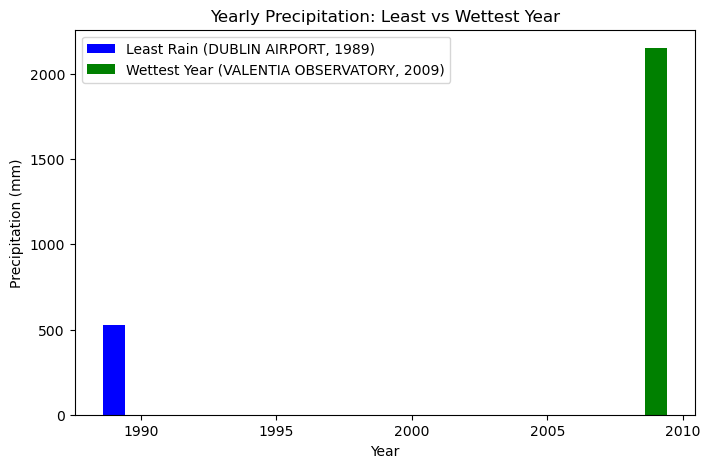

In [594]:

# Extract the values.
station_least = least_rain_year['station_id']
year_least = least_rain_year['year']
precipitation_least = least_rain_year['PRCPTOT']

station_wettest = wettest_year['station_id']
year_wettest = wettest_year['year']
precipitation_wettest = wettest_year['PRCPTOT']

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(year_least, precipitation_least, label=f'Least Rain ({station_least}, {year_least})', color='blue')
ax.bar(year_wettest, precipitation_wettest, label=f'Wettest Year ({station_wettest}, {year_wettest})', color='green')

ax.set_title('Yearly Precipitation: Least vs Wettest Year')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
plt.show()


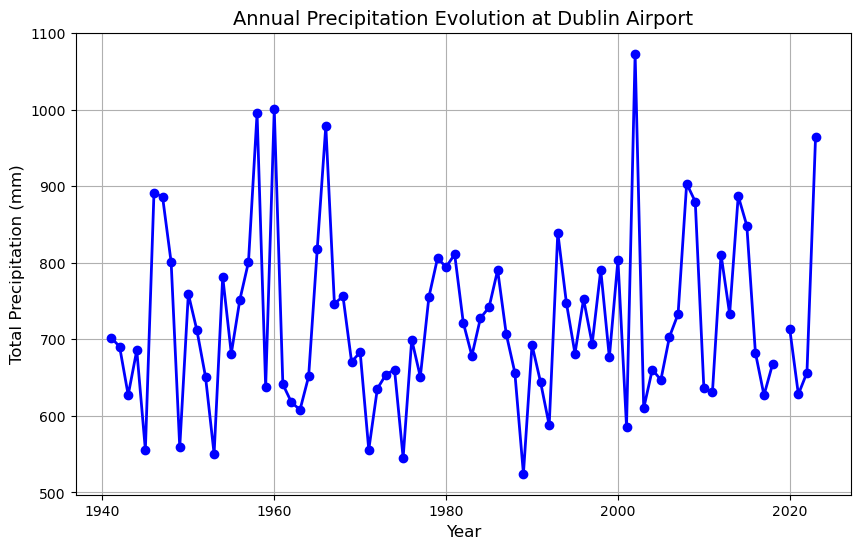

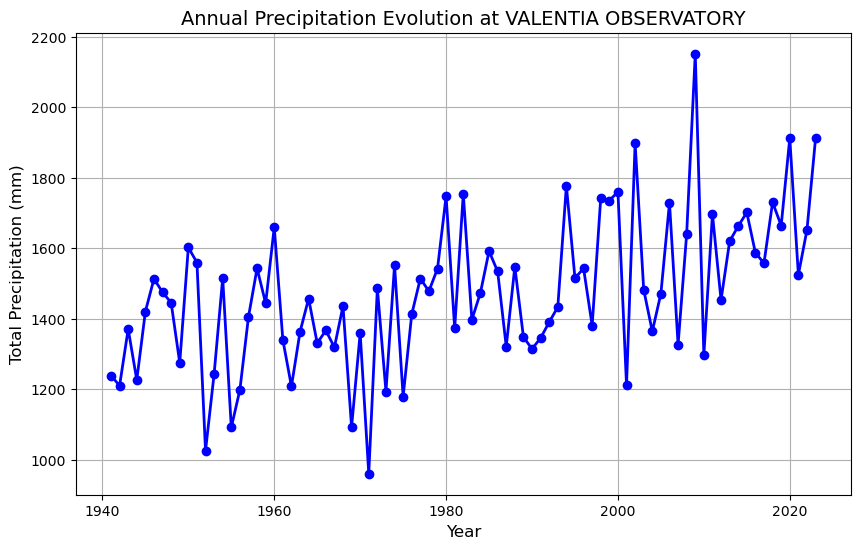

In [595]:
# Annual Precipitation Evolution at Dublin Airport and VALENTIA OBSERVATORY

# 'DUBLIN AIRPORT'
dublin_df = allyear_df[allyear_df['station_id'] == 'DUBLIN AIRPORT']

plt.figure(figsize=(10, 6))
plt.plot(dublin_df['year'], dublin_df['PRCPTOT'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
plt.title('Annual Precipitation Evolution at Dublin Airport', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Precipitation (mm)', fontsize=12)
plt.grid(True)
plt.show()

# 'VALENTIA OBSERVATORY'
valentina_df = allyear_df[allyear_df['station_id'] == 'VALENTIA OBSERVATORY']

plt.figure(figsize=(10, 6))
plt.plot(valentina_df['year'], valentina_df['PRCPTOT'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
plt.title('Annual Precipitation Evolution at VALENTIA OBSERVATORY', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Precipitation (mm)', fontsize=12)
plt.grid(True)
plt.show()


It can be seen that at Dublin Airport, there was a period between the 1970s and 1990s with lower levels of precipitation. However, in the year 2000, there was a notable increase, exceeding the average of previous years. On the other hand, at the Valentia Observatory, there was a gradual increase over the years, with a peak in 2010.

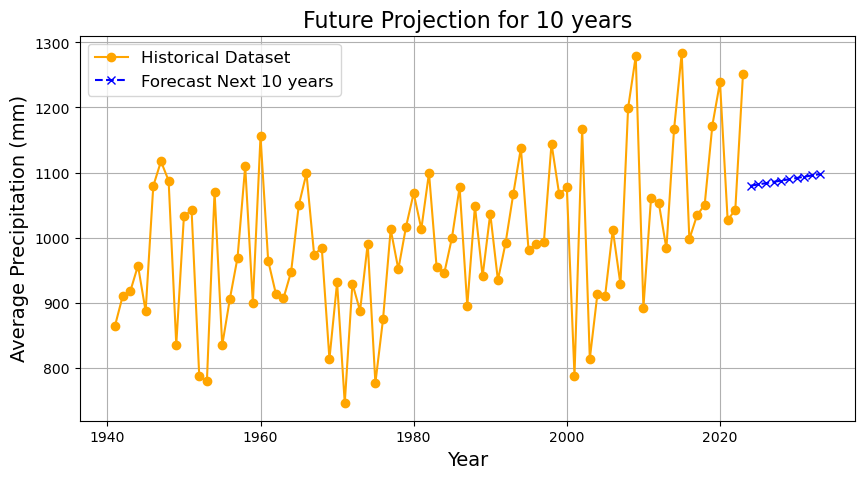

Projections for the coming years:
   year  avg_precipitation
0  2024        1079.724855
1  2025        1081.698375
2  2026        1083.671894
3  2027        1085.645414
4  2028        1087.618934
5  2029        1089.592453
6  2030        1091.565973
7  2031        1093.539493
8  2032        1095.513012
9  2033        1097.486532


In [596]:

# average precipitation for the entire year
precipitation = allyear_df.groupby('year')['PRCPTOT'].mean().reset_index()

# Rename columns
precipitation.columns = ['year', 'avg_precipitation']

# Prepare data for regression model
X = precipitation['year'].values.reshape(-1, 1)  # Years as independent variable
y = precipitation['avg_precipitation'].values   # Average precipitation as dependent variable

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Create projections for the next 10 years
forecast = np.arange(precipitation['year'].max() + 1, precipitation['year'].max() + 11).reshape(-1, 1)
forecast_predictions = model.predict(forecast)

# Combine actual and forecast data
future = pd.DataFrame({'year': forecast.flatten(), 'avg_precipitation': forecast_predictions})
all_data = pd.concat([precipitation, future])

# Plot the actual data and the projection
plt.figure(figsize=(10, 5))
plt.plot(precipitation['year'], precipitation['avg_precipitation'], label='Historical Dataset', color='orange', marker='o')
plt.plot(future['year'], future['avg_precipitation'], label='Forecast Next 10 years', color='blue', linestyle='--', marker='x')

plt.title('Future Projection for 10 years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Precipitation (mm)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

print("Projections for the coming years:")
print(future)


The code calculates the average of the PRCPTOT column for each year across all seasons. The linear model was trained with years as input (X) and average precipitation as output (y). Predictions were made for the next 10 years. The plot shows historical data and future projections. The projections show that precipitation will not undergo a radical change. Precipitation would remain close to the historical average, with an expected increase of about 1.64% over the next 10 years. The difference between 2024 and 2033 is small, showing that we will have constant levels over the years. We must consider that the data does not include external variables such as climate change and global warming.

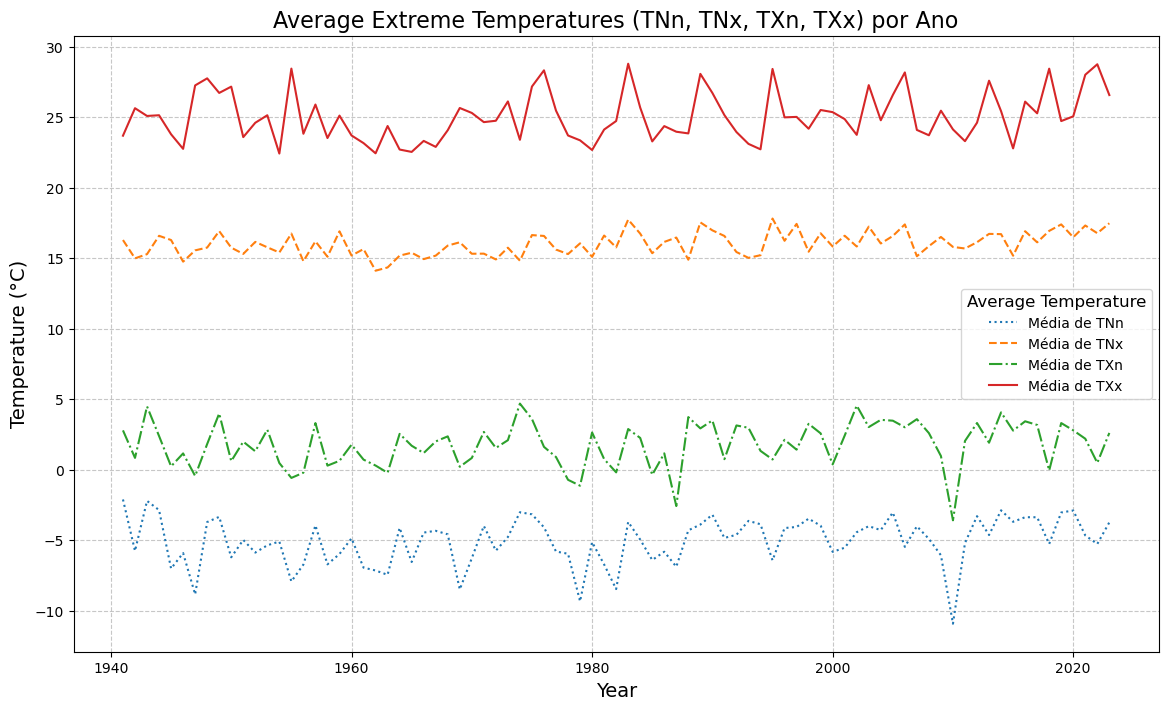

In [597]:
# Average Extreme Temperatures
# Filter relevant columns
columns_of_relevant = ['year', 'TNn', 'TNx', 'TXn', 'TXx']
temperature_data = allyear_df[columns_of_relevant]

# Calculate the average temperature for each year
temperature_data = temperature_data.groupby('year').mean()

plt.figure(figsize=(14, 8))
plt.plot(temperature_data.index, temperature_data['TNn'], label='Média de TNn', linestyle='dotted')
plt.plot(temperature_data.index, temperature_data['TNx'], label='Média de TNx', linestyle='dashed')
plt.plot(temperature_data.index, temperature_data['TXn'], label='Média de TXn', linestyle='dashdot')
plt.plot(temperature_data.index, temperature_data['TXx'], label='Média de TXx', linestyle='solid')
plt.title("Average Extreme Temperatures (TNn, TNx, TXn, TXx) por Ano", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.legend(title="Average Temperature", fontsize=10, title_fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


TNn (Coldest Night of the Year): This is the coldest nighttime temperature of the year. Imagine a super cold night and you need lots of blankets.

TNx (Warmest Night of the Year): This is the warmest nighttime temperature of the year. This is when the night is so warm that you need a fan.

TXn (Coldest Day of the Year): This is the coldest daytime temperature of the year. Imagine a freezing day and you need to wear that coat you were finally going to put away.

TXx (Hottest Day of the Year): This is the warmest daytime temperature of the year. This is that super hot day when all you want is ice cream and a walk in Salthill.

## Storn Darragh

During Professor Ian McLoughlin's final project, we did a Weather Data Automation, and a download was made from the wheter website everyday, one day we had a storm called Darrah, and I was able to see how the wind speed changed from a normal day to a stormy day.





The dataset was downloaded from the website [Today's Weather Athenry](https://data.gov.ie/dataset/todays-weather-athenry).

A Status Red wind warning was in effect, as Storm Darragh hits Ireland on 07 of December.

The data was collected on December 04, a normal day in Ireland, and December 07, with a red alert.

In [598]:
# Data Collected 04 December 2024 - normal day
# URL of raw JSON file on GitHub
normal_day = "https://raw.githubusercontent.com/GabrielaDomiciano/Computer_infrastructure_assessment/refs/heads/main/data/weather/20241204_101703.json"

weather_df = pd.read_json(normal_day)
weather_df.head()


,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,2,15n,Fog / Mist,"""Fog thinning""",2,-,S,180,98,0,1024,Wednesday,2024-04-12,00:00
1,Athenry,2,15n,Fog / Mist,"""Fog thickening""",-,-,,0,99,0,1024,Wednesday,2024-04-12,01:00
2,Athenry,2,15n,Fog / Mist,"""Fog""",4,-,E,90,99,0,1023,Wednesday,2024-04-12,02:00
3,Athenry,1,15n,Fog / Mist,"""Fog thinning""",6,-,E,90,99,0,1023,Wednesday,2024-04-12,03:00
4,Athenry,1,15n,Fog / Mist,"""Recent Fog""",4,-,E,90,99,0,1022,Wednesday,2024-04-12,04:00


In [599]:
# Data Collected 04 December 2024 - red alert
# URL of raw JSON file on GitHub
red_alert = "https://raw.githubusercontent.com/GabrielaDomiciano/Computer_infrastructure_assessment/refs/heads/main/data/weather/20241207_101548.json"

weather_df = pd.read_json(red_alert)
weather_df.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,7,,N/A,,57,93,NW,315,-99,1.3,993,Saturday,2024-07-12,00:00
1,Athenry,6,,N/A,,46,102,NW,315,-99,1.7,997,Saturday,2024-07-12,01:00
2,Athenry,6,,N/A,,54,85,NW,315,-99,0.8,999,Saturday,2024-07-12,02:00
3,Athenry,7,,N/A,,52,96,NW,315,-99,0.1,1002,Saturday,2024-07-12,03:00
4,Athenry,7,,N/A,,52,89,NW,315,-99,0.0,1003,Saturday,2024-07-12,04:00


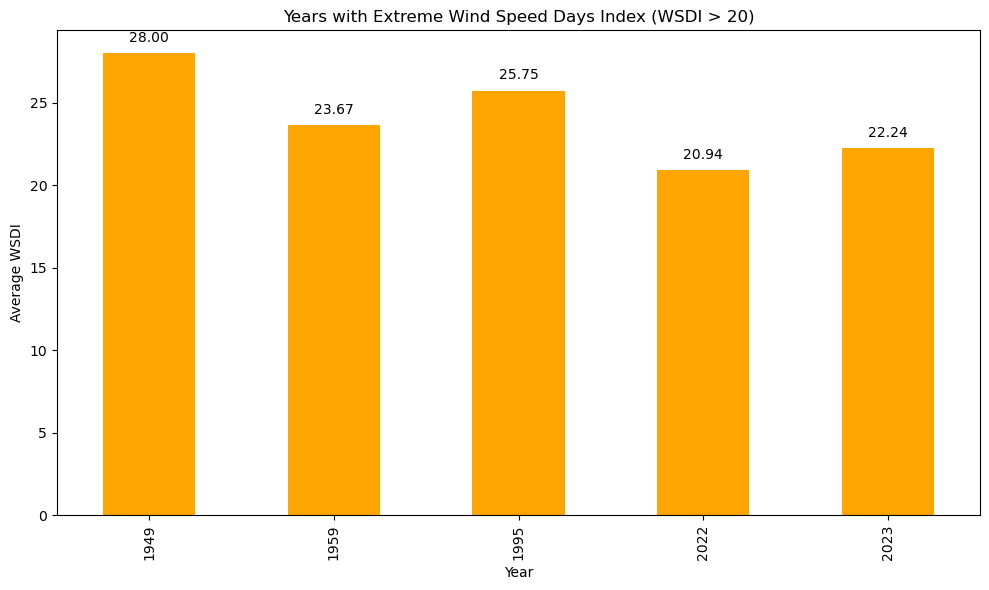

Years with strong winds (WSDI > 20):
year
1949    28.000000
1959    23.666667
1995    25.750000
2022    20.941176
2023    22.235294
Name: WSDI, dtype: float64


In [600]:

# Calculate the average WSDI per year
annual_wsd_index = allyear_df.groupby('year')['WSDI'].mean()

# # Set the threshold for strong winds
threshold = 20  # You can readjust the value as needed to set strong winds

# Filter years with average WSDI greater than threshold
extreme_winds_years = annual_wsd_index[annual_wsd_index > threshold]

plt.figure(figsize=(10, 6))
ax = extreme_winds_years.plot(kind='bar', color='orange')

# Adding WSDI averages to the chart
for i, v in enumerate(extreme_winds_years):
    ax.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Years with Extreme Wind Speed Days Index (WSDI > 20)')
plt.xlabel('Year')
plt.ylabel('Average WSDI')
plt.tight_layout()
plt.show()
print("Years with strong winds (WSDI > 20):")
print(extreme_winds_years)

December 7th had much higher wind speeds, which justifies the red alert, december 4th was relatively calm, with no severe weather conditions. This analysis suggests a drastic change in weather conditions between the two days.

Using the dataset 'Rainfall_IRL.csv' we will seee the seasons with extreme annual precipitation..

In [601]:
rainfall_df = pd.read_csv('/Users/gabrieladomicianoavellar/Desktop/PFDA_project/data/Rainfall_IRL.csv')
rainfall_df

,east,north,aar8110m1,aar8110m2,aar8110m3,aar8110m4,aar8110m5,aar8110m6,aar8110m7,aar8110m8,aar8110m9,aar8110m10,aar8110m11,aar8110m12,ANN,DJF,MAM,JJA,SON
0,25000,61000,161,121,122,90,88,94,97,113,121,168,165,159,1499,442,300,304,454
1,25000,96000,147,109,110,85,91,97,101,122,124,169,161,151,1467,407,286,320,455
2,26000,96000,147,108,109,83,86,92,96,116,119,163,157,149,1424,403,278,303,440
3,27000,97000,148,110,112,86,92,98,103,124,126,171,163,152,1488,411,290,326,461
4,27000,100000,153,110,111,82,83,88,93,113,119,164,158,152,1427,415,276,294,441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84286,365000,363000,74,53,59,52,56,57,58,67,65,81,83,78,785,206,167,182,229
84287,366000,360000,73,53,58,52,55,57,56,67,65,80,83,77,776,204,165,180,228
84288,366000,361000,73,53,58,52,55,57,57,67,65,80,83,77,777,204,165,181,228
84289,366000,362000,74,54,58,52,56,57,57,67,65,81,83,78,781,206,166,181,229


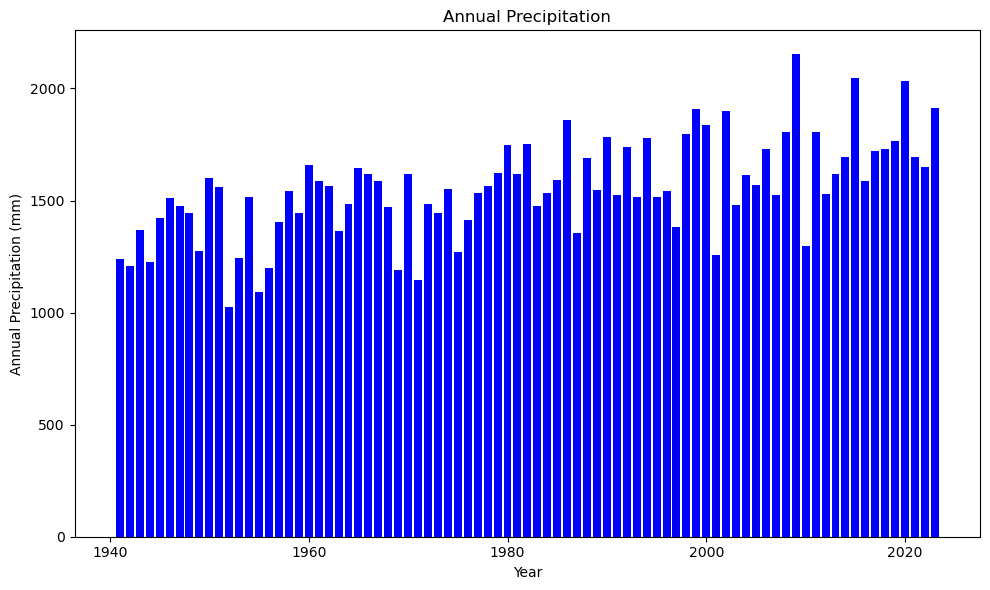

Years with extreme precipitation (>1500 mm):
      year  PRCPTOT
3     2015   1543.1
11    2023   1552.7
309   2015   1577.4
314   2020   1606.4
421   2002   1509.3
...    ...      ...
1736  2019   1664.0
1737  2020   1912.3
1738  2021   1524.6
1739  2022   1651.7
1740  2023   1911.4

[91 rows x 2 columns]


In [602]:


# Plot annual precipitation (column 'PRCPTOT' for total annual precipitation)
plt.figure(figsize=(10, 6))
plt.bar(allyear_df['year'], allyear_df['PRCPTOT'], color='blue')
plt.title('Annual Precipitation')
plt.xlabel('Year')
plt.ylabel('Annual Precipitation (mm)')
plt.tight_layout()
plt.show()

# Identify years with extreme annual precipitation (>1500 mm)
extreme_rainfall = allyear_df[allyear_df['PRCPTOT'] > 1500]
print("Years with extreme precipitation (>1500 mm):")
print(extreme_rainfall[['year', 'PRCPTOT']])


In [603]:
allyear_df = pd.read_csv('/Users/gabrieladomicianoavellar/Desktop/PFDA_project/data/all_yearly.csv')

# Find the 5 years with the most precipitation
top_5_rainy_years = allyear_df.nlargest(5, 'PRCPTOT')[['year', 'PRCPTOT']]

print("The 5 years with the highest annual precipitationl:")
print(top_5_rainy_years)


The 5 years with the highest annual precipitationl:
      year  PRCPTOT
1726  2009   2151.9
1238  2015   2046.4
1243  2020   2031.5
1737  2020   1912.3
1740  2023   1911.4


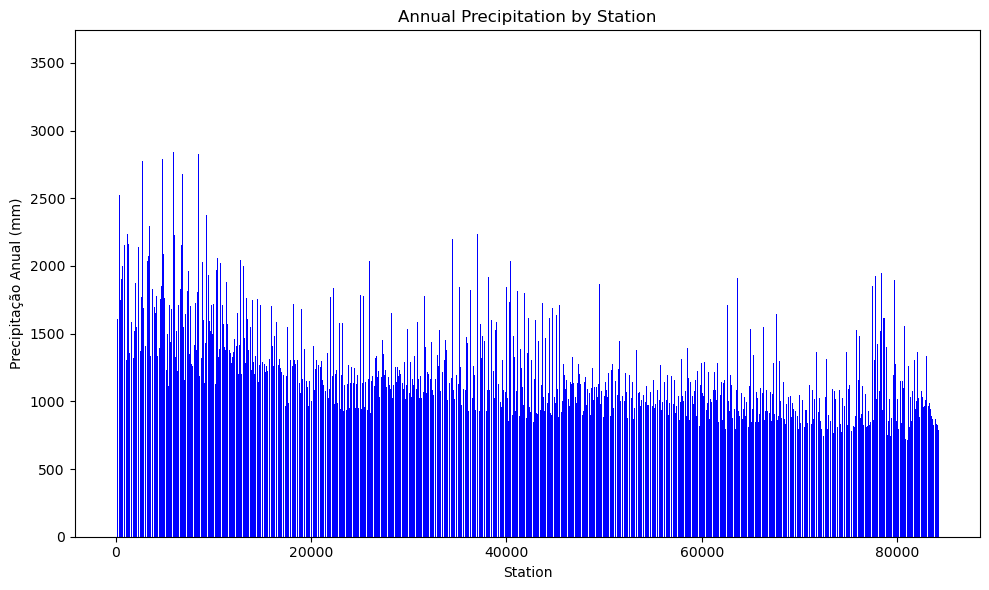

stations with extreme precipitation (>1500 mm):
         east   north   ANN
17      33000   98000  1557
18      33000   99000  1707
19      33000  100000  1523
27      34000   68000  1536
32      34000   99000  1608
...       ...     ...   ...
83047  337000  326000  1781
83048  337000  327000  1711
83049  337000  328000  1749
83050  337000  329000  1666
83051  337000  330000  1506

[14470 rows x 3 columns]


In [604]:

# Plot annual precipitation (column 'ANN')
plt.figure(figsize=(10, 6))
plt.bar(rainfall_df.index, rainfall_df['ANN'], color='blue')
plt.title('Annual Precipitation by Station')
plt.xlabel('Station')
plt.ylabel('Precipitação Anual (mm)')
plt.tight_layout()
plt.show()

# Identify stations with extreme annual precipitation (>1500 mm)
extreme_rainfall = rainfall_df[rainfall_df['ANN'] > 1500]
print("stations with extreme precipitation (>1500 mm):")
print(extreme_rainfall[['east', 'north', 'ANN']])



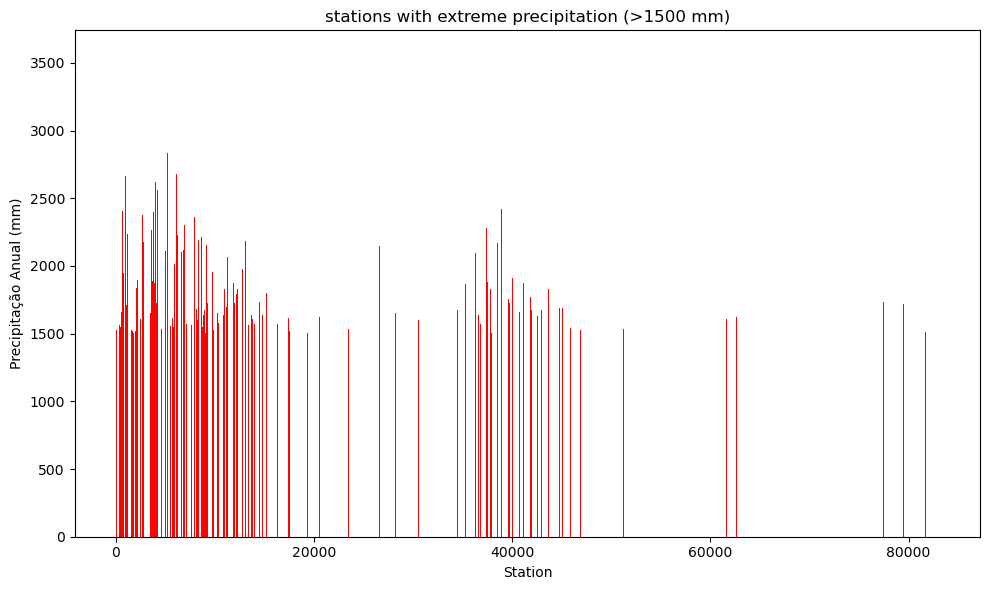

In [605]:
extreme_rainfall = rainfall_df[rainfall_df['ANN'] > 1500]
plt.figure(figsize=(10, 6))
plt.bar(extreme_rainfall.index, extreme_rainfall['ANN'], color='red')
plt.title('stations with extreme precipitation (>1500 mm)')
plt.xlabel('Station')
plt.ylabel('Precipitação Anual (mm)')
plt.tight_layout()
plt.show()


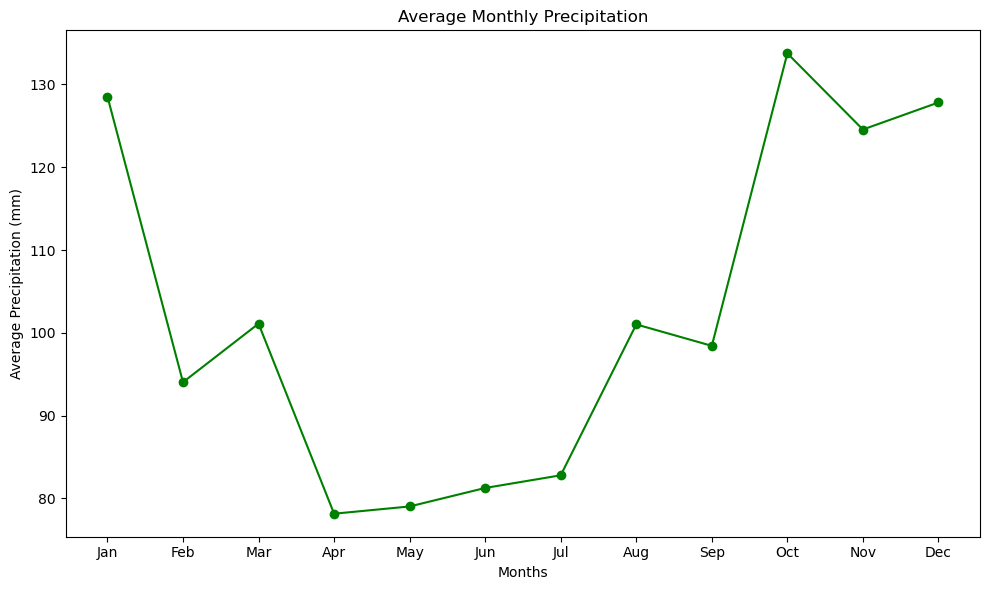

In [606]:
# Average Monthly Precipitation
monthly_avg = rainfall_df.iloc[:, 2:14].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg, marker='o', color='green')
plt.title('Average Monthly Precipitation')
plt.xlabel('Months')
plt.ylabel('Average Precipitation (mm)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()



We can observe that October, November, December, and January tend to have the highest precipitation levels, while the period from April to June consistently records the lowest precipitation amounts.

END
***************************************
